# Example for Figure 1

In [50]:
import toytree as tt
import toyplot as tp
import toyplot.svg
import numpy as np
import pandas as pd

import sccoda.util.cell_composition_data as dat
import sccoda.util.data_visualization as viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import tasccoda.tree_utils as ut

Define the newick string for the tree and import it into toytree

In [85]:
newick_example = "((T1, T2, T3, T4)N2, (T5, T6)N3)N1;"
ex_tree = tt.tree(newick=newick_example, tree_format=8)

Draw the tree

In [91]:
canvas = tp.Canvas(width=800, height=400)
ax0 = canvas.cartesian(bounds=(0, 800, 0, 400), padding=0)

ex_tree.draw(
    layout="d",
    edge_type="c",
    node_sizes=[30 for i in ex_tree.get_node_values("name", 1, 1)],
    node_style={"stroke": "black"},
    node_labels=[x for x in ex_tree.get_node_values("name", 1, 1)],
    node_labels_style={"font-size": 12},
    tip_labels=False,
    node_colors=[
        "lightblue" if i in ["T1", "N1", "N2"] else
        "lightcoral" if i in ["N3"] else
        "goldenrod" if i in ["T5", "T6"] else
        "lightgrey" for i in ex_tree.get_node_values("name", 1, 1)],
    width=800,
    height=400,
    axes=ax0
)
# tp.svg.render(canvas, "./fig1_tree_v2.svg")

## Example dataset

In [87]:
np.random.seed(1234)

n = 20
N = 3000
base_abun = np.array([500, 500, 500, 500, 500, 500])
pert_abun = np.array([250, 250, 250, 250, 1000, 1000])

base_samples = np.random.multinomial(N, base_abun/N, int(n/2))
pert_samples = np.random.multinomial(N, pert_abun/N, int(n/2))
Y = np.concatenate([base_samples, pert_samples])
otus = ["T1", "T2", "T3", "T4", "T5", "T6"]

cov = pd.DataFrame({"Condition": np.repeat(["Control", "Case"], 10)})
data_ = {"Condition": np.repeat(["Control", "Case"], int(n/2))}
for i in range(len(otus)):
    data_[otus[i]] = Y[:,i]
data_ = pd.DataFrame(data_)

data = dat.from_pandas(data_, covariate_columns=["Condition"])
data.uns["phylo_tree"] = ex_tree

/Users/johannes.ostner/opt/anaconda3/envs/scCODA_3/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


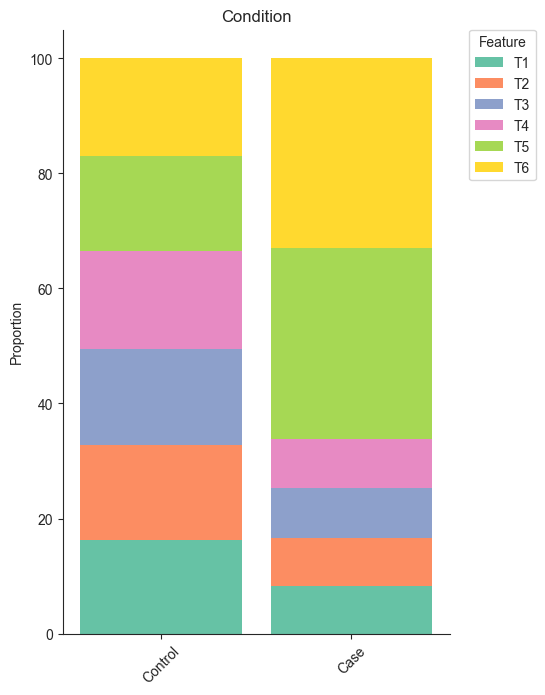

In [88]:
viz.stacked_barplot(data, "Condition", cmap=matplotlib.cm.Set2, figsize=(5, 8))
sns.despine()
plt.legend(title="Feature", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,)
plt.savefig("./example_stackbar.svg", format="svg", bbox_inches="tight")
plt.show()

## Example ancestor matrix

In [89]:
A, _ = ut.get_A(ex_tree)
A = A.astype("int")
print(A)

[[1 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 1 0]
 [0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 1]
 [0 0 0 0 0 1 0 1]]


In [90]:
# convert matrix to latex - from https://gist.github.com/tpaschalis/7a2943c2248b78b2558c457428086082
def np2lat(A):
	filename = './table.tex'
	f = open(filename, 'a')
	cols = A.shape[1]

	# Change alignment and format of your output
	tabformat = '%.0f'
	tabalign = 'c'*cols

	f.write('\n\\begin{table}[h]\n')
	f.write('\\centering\n')
	f.write('\\begin{tabular}{%s}\n' %tabalign)

	# Use some numpy magic, just addding correct delimiter and newlines
	np.savetxt(f, A, fmt=tabformat, delimiter=' & ', newline='\\\\\n')

	f.write('\\end{tabular}\n')
	f.write('\\end{table}\n')

	f.flush()
	f.close()

np2lat(A.astype(int))